# ***Import Libraries and Read Data***

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Read File
df_customer = pd.read_csv('Datasets/segmentation data.csv')

# Display first 3 rows
df_customer.head(3)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0


# ***Preprocessign***

## *Data Cleaning*

### *Remove Irrelevent*

In [2]:
# Remove ID
df_customer = df_customer.drop('ID', axis = 1)

# Display result
df_customer.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0


### *Handling Missing*

In [3]:
# Check nulls
df_customer.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### *Handling Outliers*

In [4]:
# Check structure
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [5]:
# Get description
df_customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


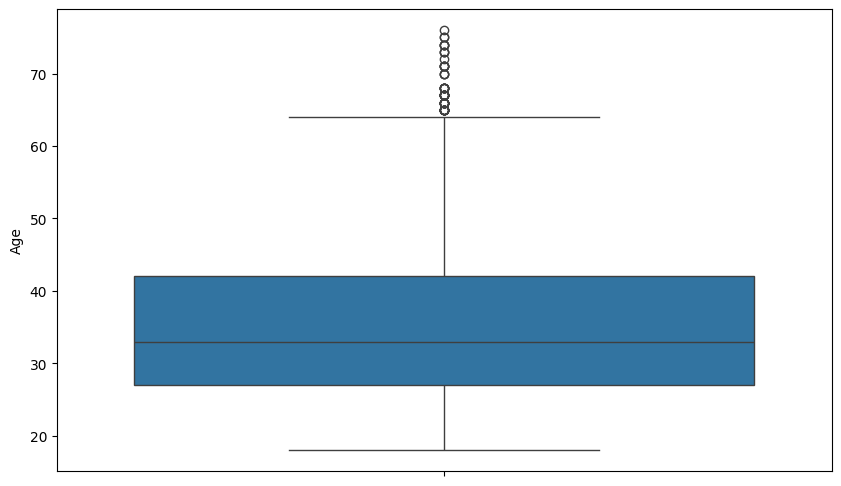

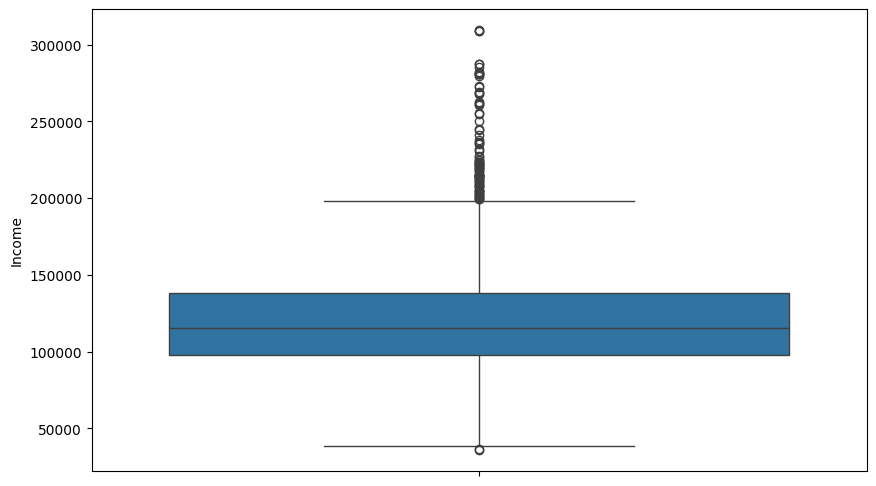

In [6]:
# Check Outliers for age
plt.figure(figsize=(10,6))
sns.boxplot(data = df_customer['Age'])
plt.show()

# Check Outliers for income
plt.figure(figsize=(10,6))
sns.boxplot(data = df_customer['Income'])
plt.show()

In [7]:
# Function for handling outliers
def handling_outlier(df):
    df_cleaned = df.copy()

    for col in df_cleaned.select_dtypes(include = [np.number]).columns:
        # Calculate quartile range
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate mild bounderies
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate extreme bounderies
        lower_extreme_bound = Q1 - 3 * IQR
        upper_extreme_bound = Q3 + 3 * IQR

        # Drop Extereme outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_extreme_bound) & (df_cleaned[col] <= upper_extreme_bound)]

        # Cap outliers
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound,
                np.where(df_cleaned[col] < lower_bound,lower_bound,df_cleaned[col]))
        
    return df_cleaned

# Handling outliers
df_customer = handling_outlier(df_customer)

# Display result
df_customer.describe()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,1379.000000,1379.000000,1379.000000,1379.0,1379.000000,1379.000000,1379.000000
mean,0.504714,0.553299,33.309645,1.0,115061.822154,0.791153,0.684554
std,0.500159,0.497331,8.388377,0.0,29298.936051,0.616566,0.795388
min,0.000000,0.000000,18.000000,1.0,44248.250000,0.000000,0.000000
25%,0.000000,0.000000,26.000000,1.0,96150.500000,0.000000,0.000000
50%,1.000000,1.000000,33.000000,1.0,112250.000000,1.000000,0.000000
75%,1.000000,1.000000,39.000000,1.0,130936.000000,1.000000,1.000000
max,1.000000,1.000000,58.000000,1.0,183308.250000,2.000000,2.000000


### *Handling Duplicates*

In [8]:
# Check duplictes
df_customer.duplicated().sum()

np.int64(8)

In [9]:
# Remove duplicates
df_customer = df_customer.drop_duplicates()

# Check duplicates
df_customer.duplicated().sum()

np.int64(0)

In [10]:
# Check shape
df_customer.shape

(1371, 7)

## *Scaling*

In [11]:
# Create scaller
sc = StandardScaler()

# Columns that will be scaled
cols_to_scale = ['Age','Income']

# Fit and transform train data
df_customer[cols_to_scale] = pd.DataFrame(
    sc.fit_transform(df_customer[cols_to_scale]),
    columns=cols_to_scale,
    index=df_customer.index
)

# Display train data
df_customer.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,1.0,1.0,-1.345543,1.0,1.239204,1.0,2.0
2,0.0,0.0,1.870572,1.0,-0.891472,0.0,0.0
3,0.0,0.0,1.394110,1.0,1.958808,1.0,1.0


# ***Modeling***

## *K-Means*

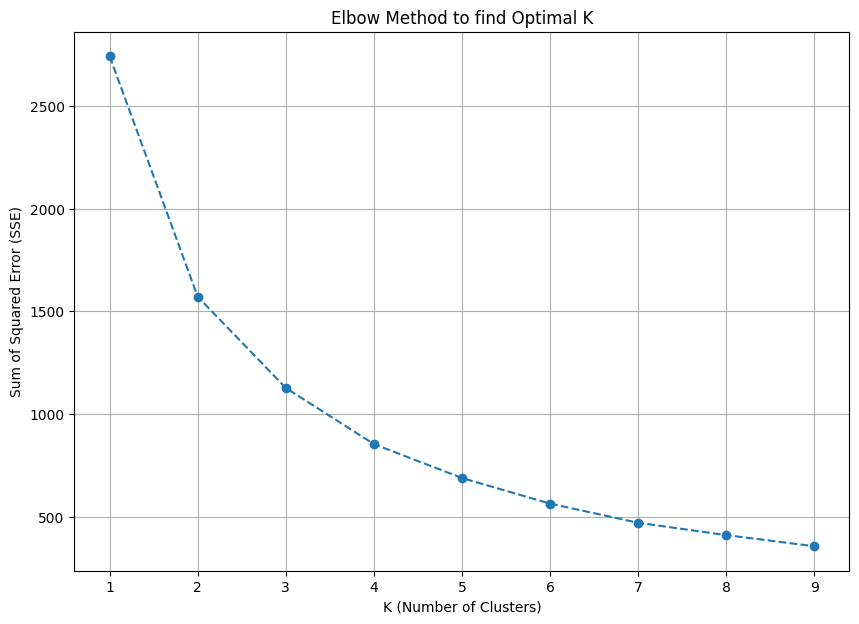

In [12]:
# Get data that will use it for grouping
X = df_customer[['Age', 'Income']]

# Get elbow values
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    km_elbow.fit(X)
    sse.append(km_elbow.inertia_)

# Display visual of elbow
plt.figure(figsize=(10, 7))
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method to find Optimal K')
plt.plot(k_rng, sse, marker='o', linestyle='--')
plt.grid(True)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2412\4028520542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y_predicted


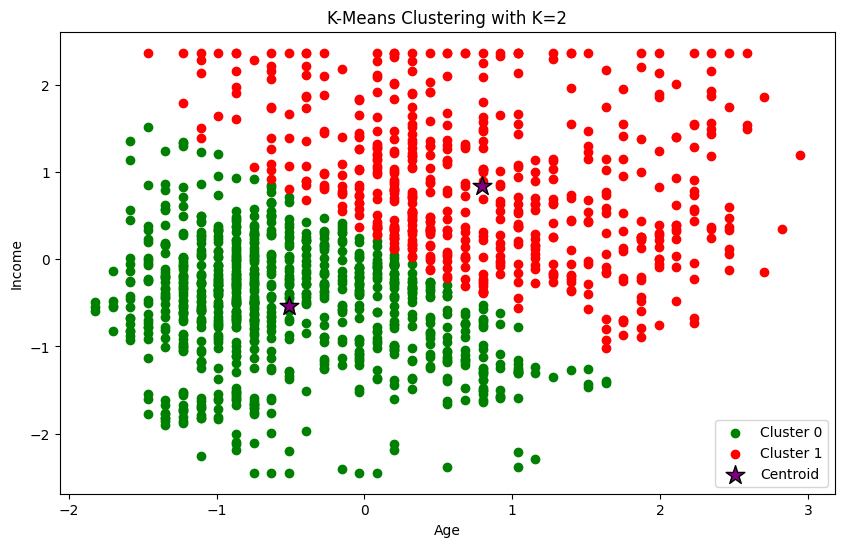

In [13]:
# Create instance from kmeans model
km = KMeans(n_clusters=2, random_state=42)

# Group data
y_predicted = km.fit_predict(X)

# Add new column by group id
X['cluster'] = y_predicted

# Create dataframe for each group for visualiztion
df1 = X[X.cluster == 0]
df2 = X[X.cluster == 1]

# Create visual
plt.figure(figsize=(10, 6))
plt.scatter(df1.Age, df1['Income'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income'], color='red', label='Cluster 1')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            color='purple', marker='*', label='Centroid', s=200, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering with K=2')
plt.legend()

# Display visual
plt.show()

## *DBScan*

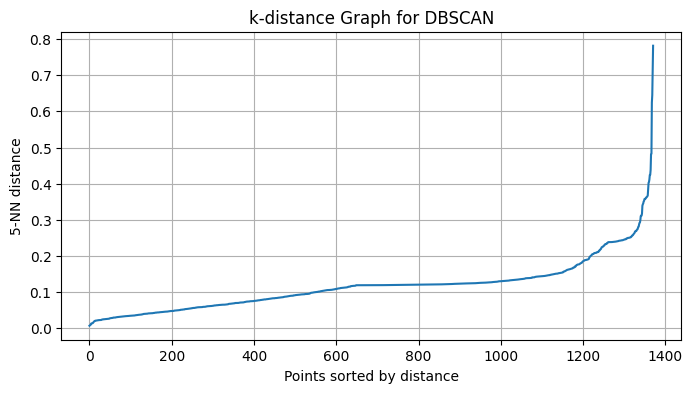

In [14]:
# Create Instance
neighbors = NearestNeighbors(n_neighbors= 5)

# Fit to data
neighbors_fit = neighbors.fit(df_customer[['Age','Income']])

# Get indices and distance
distances, indices = neighbors_fit.kneighbors(df_customer[['Age','Income']])

# Sort distance
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{5}-NN distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid(True)
plt.show()

In [15]:
# Create DBScan instance
dbscan = DBSCAN(eps= 0.2, min_samples= 5)

# Discover pattern
clusters = dbscan.fit_predict(df_customer)

# Add cluster label to original dataframe
df_customer['Cluster'] = clusters

# Display Result
df_customer.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,1.0,1.0,-1.345543,1.0,1.239204,1.0,2.0,-1
2,0.0,0.0,1.870572,1.0,-0.891472,0.0,0.0,5
3,0.0,0.0,1.394110,1.0,1.958808,1.0,1.0,-1
4,0.0,0.0,2.347033,1.0,1.178914,1.0,1.0,-1
5,0.0,0.0,0.202957,1.0,1.034141,0.0,0.0,-1


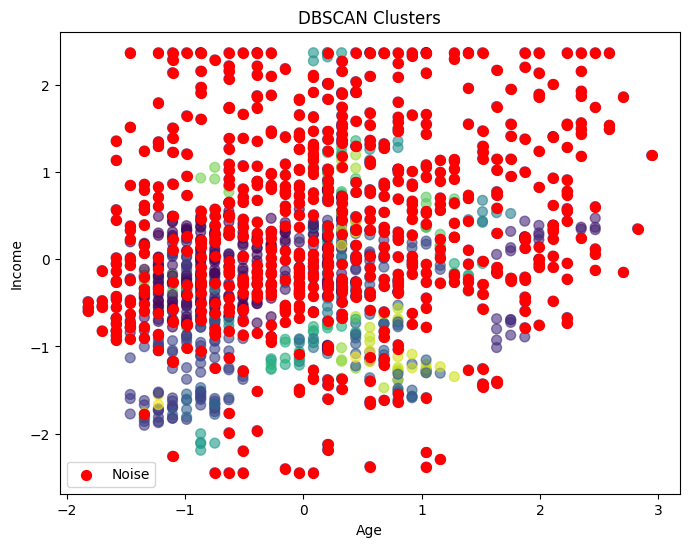

In [16]:
# Get visual parameter
x = df_customer['Age']
y = df_customer['Income']
clusters = df_customer['Cluster']

# Create scatter plot
plt.figure(figsize=(8,6))

# Use color for clusters
plt.scatter(x, y, c=clusters, cmap='viridis', s=50, alpha=0.6)

# Mark noise points (DBSCAN labels them as -1)
plt.scatter(x[clusters == -1], y[clusters == -1], c='red', s=50, label='Noise')

# Set visual options
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clusters')
plt.legend()

# Display visual
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2412\1039155981.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


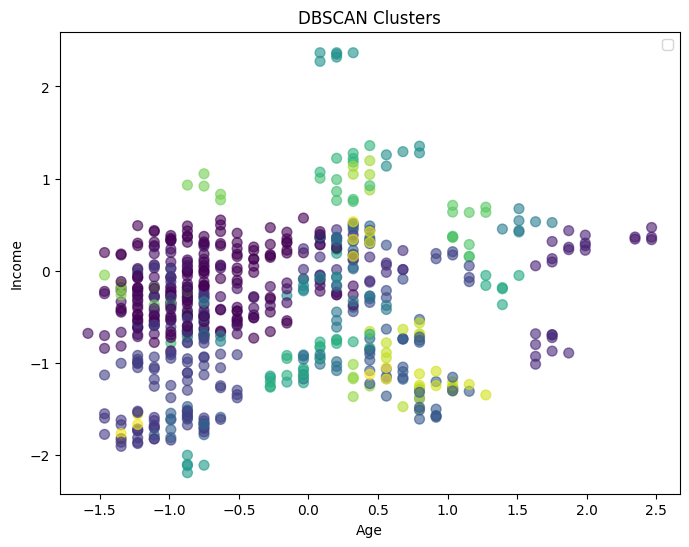

In [17]:
# Filter out noise points (cluster label != -1)
df_clusters = df_customer[df_customer['Cluster'] != -1]

# Get visual parameter
x = df_clusters['Age']
y = df_clusters['Income']
clusters = df_clusters['Cluster']

# Create scatter plot
plt.figure(figsize=(8,6))

# Use color for clusters
plt.scatter(x, y, c=clusters, cmap='viridis', s=50, alpha=0.6)

# Set visual options
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clusters')
plt.legend()

# Display visual
plt.show()

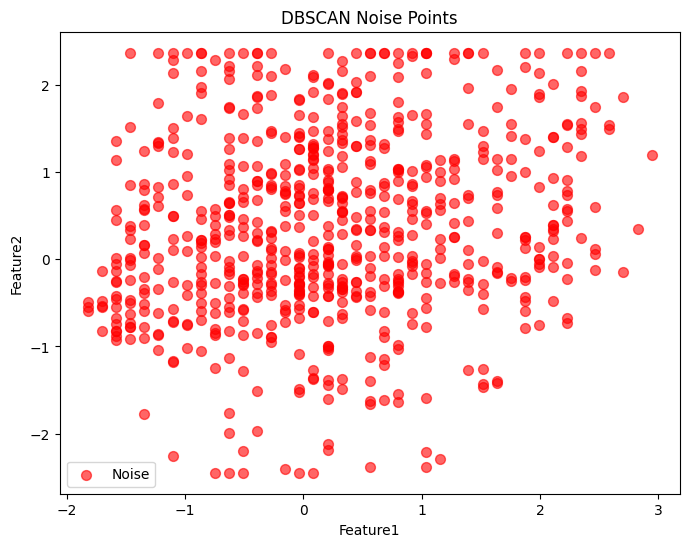

In [18]:
# Filter only noise points (Cluster = -1)
noise = df_customer[df_customer['Cluster'] == -1]

# Create visual
plt.figure(figsize=(8,6))
plt.scatter(noise['Age'], noise['Income'], c='red', s=50, alpha=0.6, label='Noise')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('DBSCAN Noise Points')
plt.legend()

# Display noise
plt.show()

# ***Comparison***

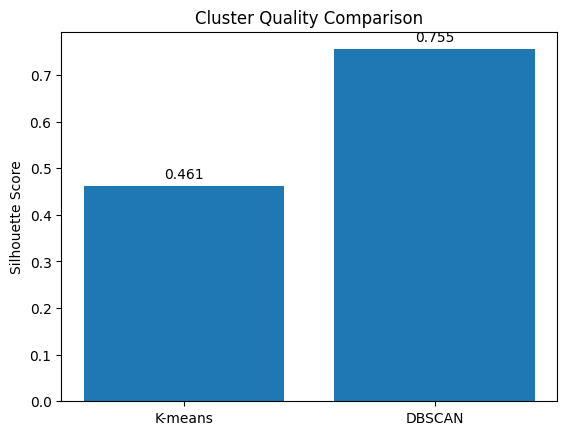

In [19]:
# Get score of two models
scores = {
    'K-means': silhouette_score(X, X.cluster),
    'DBSCAN': silhouette_score(df_customer[df_customer['Cluster'] != -1], 
                                df_customer['Cluster'][df_customer['Cluster'] != -1])  # exclude noise
}

# Create bar chart by score
bars = plt.bar(scores.keys(), scores.values())
plt.ylabel('Silhouette Score')
plt.title('Cluster Quality Comparison')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3),
            ha='center', va='bottom')  # round to 3 decimals

# Display
plt.show()

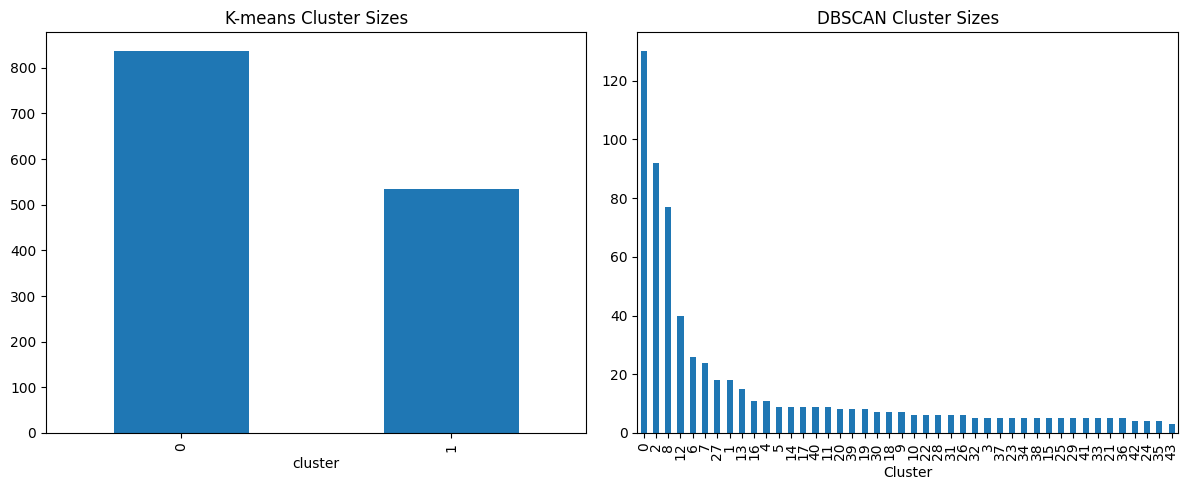

In [20]:
# Create one subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-means cluster sizes
pd.Series(X.cluster).value_counts().plot(
    kind='bar', 
    ax=axes[0], 
    title='K-means Cluster Sizes'
)

# DBSCAN cluster sizes (excluding noise)
pd.Series(df_customer['Cluster'][df_customer['Cluster'] != -1]).value_counts().plot(
    kind='bar', 
    ax=axes[1], 
    title='DBSCAN Cluster Sizes'
)

# Dispay results
plt.tight_layout()
plt.show()

In [21]:
# K-means Summary
print("=" * 60)
print(f"{'K-MEANS CLUSTERING SUMMARY':^60}")
print("=" * 60)

# Number of clusters
kmeans_labels = X.cluster  # or your K-means labels
num_clusters = len(set(kmeans_labels))
print(f"Number of clusters     : {num_clusters}")

# Cluster sizes
cluster_counts = pd.Series(kmeans_labels).value_counts()
print("\nCluster sizes:")
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} points")

# Noise (always 0 for K-means)
print(f"\nNoise points           : 0 (0.00%)")

# DBSCAN Summary
print("\n" + "=" * 60)
print(f"{'DBSCAN CLUSTERING SUMMARY':^60}")
print("=" * 60)

# Number of clusters (excluding noise)
num_clusters = len(set(df_customer['Cluster'])) - (1 if -1 in df_customer['Cluster'] else 0)
print(f"Number of clusters     : {num_clusters}")

# Noise points
num_noise = (df_customer['Cluster'] == -1).sum()
percent_noise = num_noise / len(df_customer) * 100
print(f"Noise points           : {num_noise} ({percent_noise:.2f}%)")


                 K-MEANS CLUSTERING SUMMARY                 
Number of clusters     : 2

Cluster sizes:
  Cluster 0: 836 points
  Cluster 1: 535 points

Noise points           : 0 (0.00%)

                 DBSCAN CLUSTERING SUMMARY                  
Number of clusters     : 45
Noise points           : 709 (51.71%)
